# Lab 1:  Exploring Table Data

#### Zihao Mao and Cameron Matson

# Business Understanding 
	
The employees in the tech workplace work with high intensity and pressure. Their mental health should raise their employers’ attention. Employers should know what percentage of their employees are suffer from mental illness, and what can be the common features of such employees.  
    
OSMI Mental Health in Tech Survey 2016 covers employees in the tech industry from all over the world asking them an assortment of 63 questions which produces numerical and categorical features. Twelve of the features are used to find the answers of the questions above. 	
    
The data set will be analyzed, visualized, explored, etc. it can tell the distribution of the employees with mental health disorder, and how different features can affect the distribution. 
    
Employers could use the analytics to have a better idea of their tech employees’ mental health, and what can possible cause the mental illness. Therefore, the overall mental health condition of teach employee can raise employers’ attention, and can better improved. 

Dataset: OSMI Mental Health in Tech Survey 2016 URL: https://www.kaggle.com/osmi/mental-health-in-tech-2016#  
    
Questions Of Interest: 
- How are tech employees with mental health disorder distributed?
- What are the common features of the tech employees with mental health disorder?


## The Data

There were 53 questions on the survey, many of which were open ended, so there needs to be some inspection into the data both for the sake of efficiency and quality

In [1906]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/mental-heath-in-tech-2016_20161114.csv')
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


There were a lot of questions asked in this survey.  We are only going to consider a few of them here.

In [1907]:
data = np.array([df['What is your age?'],
        df['What is your gender?'],
        df['What country do you live in?'],
        df['What country do you work in?'],
        df['How many employees does your company or organization have?'],
        df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'],
        df['Do you have a family history of mental illness?'],
        df['Have you had a mental health disorder in the past?'],
        df['Do you currently have a mental health disorder?'],
        df['Have you ever sought treatment for a mental health issue from a mental health professional?'],
        df['Do you work remotely?']
       ])

columns= ['age',
         'gender',
         'residence_location',
         'work_location',
         'num_employees',
         'employer_awareness',
         'family_history',
         'past_history',
         'current_state',
         'treatment',
         'remote']


In [1908]:
df = pd.DataFrame(data=data)
df = df.T # transpose because lists are horizontal
df.columns = columns
df.head()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
0,39,Male,United Kingdom,United Kingdom,26-100,No,No,Yes,No,0,Sometimes
1,29,male,United States of America,United States of America,6-25,Yes,Yes,Yes,Yes,1,Never
2,38,Male,United Kingdom,United Kingdom,6-25,No,No,Maybe,No,1,Always
3,43,male,United Kingdom,United Kingdom,NaN,NaN,No,Yes,Yes,1,Sometimes
4,43,Female,United States of America,United States of America,6-25,No,Yes,Yes,Yes,1,Sometimes


In [1909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 11 columns):
age                   1433 non-null object
gender                1430 non-null object
residence_location    1433 non-null object
work_location         1433 non-null object
num_employees         1146 non-null object
employer_awareness    1146 non-null object
family_history        1433 non-null object
past_history          1433 non-null object
current_state         1433 non-null object
treatment             1433 non-null object
remote                1433 non-null object
dtypes: object(11)
memory usage: 123.2+ KB


Lets look at each attribute in more detail

In [1910]:
data_des = pd.DataFrame()
data_des['Features'] = df.columns
data_des['Description'] = ['age of the worker',
                           'gender of the worker',
                           'the countery where the worker lives',
                           'the country where the worker works',
                           'how many employees works within the workplace where the worker works', 
                           'whether the employer has formally discussed about the mental health of the worker', 
                           'whether the worker has family hisotry of mental disorder', 
                           'whether the worker has experienced mental disorder in the past',
                           'whether the worker is currently having mental disorder',
                           'if the worker has mental disorder experience, whether he/she sought fot treatment from professinals',
                           'whether the worker work remotely']
data_des['Scales'] = [
    'ordinal',
    'nominal',
    'nominal',
    'nominal',
    'interval',
    'nominal',
    'nominal',
    'nominal',
    'nominal',
    'nominal',
    'nominal'
]

data_des['Discrete/Continuous'] = ['discrete'] * 4 + ['continuous'] + ['discrete'] * 6
data_des 

,Features,Description,Scales,Discrete/Continuous
0,age,age of the worker,ordinal,discrete
1,gender,gender of the worker,nominal,discrete
2,residence_location,the countery where the worker lives,nominal,discrete
3,work_location,the country where the worker works,nominal,discrete
4,num_employees,how many employees works within the workplace ...,interval,continuous
5,employer_awareness,whether the employer has formally discussed ab...,nominal,discrete
6,family_history,whether the worker has family hisotry of menta...,nominal,discrete
7,past_history,whether the worker has experienced mental diso...,nominal,discrete
8,current_state,whether the worker is currently having mental ...,nominal,discrete
9,treatment,"if the worker has mental disorder experience, ...",nominal,discrete


### Age

First let's see if all of the entries for the age attribute are numeric

In [1911]:
df[df.age.apply(lambda x: type(x)!=np.int64)]

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote


They are, which is good.  So we can go ahead and cast that attribute as an integer

In [1912]:
# casting as an int
df.age = df.age.astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 11 columns):
age                   1433 non-null int64
gender                1430 non-null object
residence_location    1433 non-null object
work_location         1433 non-null object
num_employees         1146 non-null object
employer_awareness    1146 non-null object
family_history        1433 non-null object
past_history          1433 non-null object
current_state         1433 non-null object
treatment             1433 non-null object
remote                1433 non-null object
dtypes: int64(1), object(10)
memory usage: 123.2+ KB


Let's see what kind of values we have for age.

In [1913]:
df.age.describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

Looks like there a few erroneous entries.  It's doubtful that a 3 yo participated in this survey, and no one is 323.  Lets restrict the ages from 18 - 65, which is a typical age range for working adults.

In [1914]:
df.drop(df[(df.age<16) | (df.age > 65)].index, inplace=True)
df.age.describe()

count    1426.000000
mean       33.998597
std         7.933407
min        17.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        65.000000
Name: age, dtype: float64

### Gender


In [1915]:
df.gender.describe()

count     1423
unique      68
top       Male
freq       607
Name: gender, dtype: object

There are 70 unique types.  That's not an issue in general, but it might make it difficult for the purpose of analysis.  But out of curiosity, what are all 70...

In [1916]:
set(df.gender)

{nan,
 'Unicorn',
 'Androgynous',
 'Agender',
 'Man',
 'I identify as female.',
 'genderqueer woman',
 'mtf',
 'Cis female ',
 'Malr',
 'female',
 'M',
 'Male',
 'cisdude',
 'cis man',
 'male',
 'human',
 'genderqueer',
 'Genderfluid (born female)',
 'Woman',
 'Dude',
 'non-binary',
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
 'mail',
 'Queer',
 'MALE',
 'Female ',
 'female/woman',
 'female ',
 'Cisgender Female',
 'm',
 'Male.',
 'Cis-woman',
 'Genderqueer',
 'Male/genderqueer',
 'Transgender woman',
 'Male ',
 'Male (cis)',
 'Other/Transfeminine',
 'Sex is male',
 'woman',
 'fem',
 'none of your business',
 'Male (trans, FtM)',
 'Genderflux demi-girl',
 'Female or Multi-Gender Femme',
 'Female assigned at birth ',
 'Transitioned, M2F',
 'Cis Male',
 'AFAB',
 'Nonbinary',
 'Fluid',
 'Genderfluid',
 'Enby',
 'Cis male',
 'Female (props for making this a freeform field, 

Wow.  Okay that's great. Lets order it, hopefully something useful will appear.

In [1917]:
df.groupby('gender').size().sort_values(ascending=False)

gender
Male                                                                                                                                                             607
male                                                                                                                                                             247
Female                                                                                                                                                           153
female                                                                                                                                                            95
M                                                                                                                                                                 86
m                                                                                                                                                                 79
F  

We take [Male,male,M,m] and [Female,female,F,f] to male and female respectively, and drop everything else... not that they're inaccuracies, but because it will simplify the analysis.

In [1918]:
# replace varieties of male and female to 0 and 1
df.gender.replace(to_replace=['Male', 'M', 'male', 'm'], value=0, inplace=True)
df.gender.replace(to_replace=['Female', 'F', 'female', 'f'], value=1, inplace=True)

# remove all other observations
df = df[df.gender.isin([0,1])]
df.gender = df.gender.astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1431
Data columns (total 11 columns):
age                   1328 non-null int64
gender                1328 non-null bool
residence_location    1328 non-null object
work_location         1328 non-null object
num_employees         1065 non-null object
employer_awareness    1065 non-null object
family_history        1328 non-null object
past_history          1328 non-null object
current_state         1328 non-null object
treatment             1328 non-null object
remote                1328 non-null object
dtypes: bool(1), int64(1), object(9)
memory usage: 115.4+ KB


### Number of Employees

It looks like there some missing data for number of employees and employer awareness.  Inspecting the dataset shows that these rows all correspond to participants who reported being self-employed.  Since we're interested primarily in the relationship between the person and their company, we'll just go ahead and drop these instances.

In [1919]:
df.dropna(subset=['num_employees'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 0 to 1431
Data columns (total 11 columns):
age                   1065 non-null int64
gender                1065 non-null bool
residence_location    1065 non-null object
work_location         1065 non-null object
num_employees         1065 non-null object
employer_awareness    1065 non-null object
family_history        1065 non-null object
past_history          1065 non-null object
current_state         1065 non-null object
treatment             1065 non-null object
remote                1065 non-null object
dtypes: bool(1), int64(1), object(9)
memory usage: 92.6+ KB


In [1920]:
df.head()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
0,39,False,United Kingdom,United Kingdom,26-100,No,No,Yes,No,0,Sometimes
1,29,False,United States of America,United States of America,6-25,Yes,Yes,Yes,Yes,1,Never
4,43,True,United States of America,United States of America,6-25,No,Yes,Yes,Yes,1,Sometimes
5,42,False,United Kingdom,United Kingdom,More than 1000,No,No,No,Yes,1,Sometimes
6,30,False,United States of America,United States of America,26-100,No,No,No,No,0,Sometimes


The number of employees was reported as a range, since its ordinal, we can encode this into an integer.

In [1921]:
set(df.num_employees)

{'1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000'}

In [1922]:
df.num_employees.replace(to_replace=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
               value=range(1,7),
               inplace=True)

### Nominal attributes

We will replace the text responses with integers.  This is not a great way to do this as using an integer implies some sort of ordering, we should one-hot encode them, but since we aren't going to be training any algorithm on this data at the moment, we can get away with it.

Survey questions are difficult because they are posed as binary, but then allow more than two responses.  We could choose to only look at 'Yes' and 'No' responses and ignore the ambivalent 'Maybe' and 'I don't know'.

In [1923]:
df.past_history.replace(to_replace=['No', 'Maybe', 'Yes'], value=[0, 1, 2], inplace=True)
df.current_state.replace(to_replace=['No', 'Maybe', 'Yes'], value=[0, 1, 2], inplace=True)

df.employer_awareness.replace(to_replace=['No', 'Yes', 'I don\'t know'], value=[0, 1, 2], inplace=True)
df.family_history.replace(to_replace=['No', 'Yes', 'I don\'t know'], value=[0, 1, 2], inplace=True)

df.remote.replace(to_replace=['Never','Sometimes','Always'], value=[0,1,2], inplace=True)

df.treatment = df.treatment.astype(bool)

In [1924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 0 to 1431
Data columns (total 11 columns):
age                   1065 non-null int64
gender                1065 non-null bool
residence_location    1065 non-null object
work_location         1065 non-null object
num_employees         1065 non-null int64
employer_awareness    1065 non-null int64
family_history        1065 non-null int64
past_history          1065 non-null int64
current_state         1065 non-null int64
treatment             1065 non-null bool
remote                1065 non-null int64
dtypes: bool(2), int64(7), object(2)
memory usage: 85.3+ KB


In [1925]:
df

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
0,39,False,United Kingdom,United Kingdom,3,0,0,2,0,False,1
1,29,False,United States of America,United States of America,2,1,1,2,2,True,0
4,43,True,United States of America,United States of America,2,0,1,2,2,True,1
5,42,False,United Kingdom,United Kingdom,6,0,0,0,2,True,1
6,30,False,United States of America,United States of America,3,0,0,0,0,False,1
7,37,True,United States of America,United States of America,6,0,1,2,2,True,2
8,44,True,United States of America,United States of America,3,0,1,2,2,True,1
10,28,False,United States of America,United States of America,3,1,2,2,2,True,0
11,34,False,United States of America,United States of America,4,0,1,2,2,True,1
12,30,True,United States of America,United States of America,4,0,1,2,2,True,2


## Visualizations and Relationships

In [1926]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

In [1927]:
df.groupby('past_history').count()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,current_state,treatment,remote
past_history,,,,,,,,,,
0,365,365,365,365,365,365,365,365,365,365
1,175,175,175,175,175,175,175,175,175,175
2,525,525,525,525,525,525,525,525,525,525


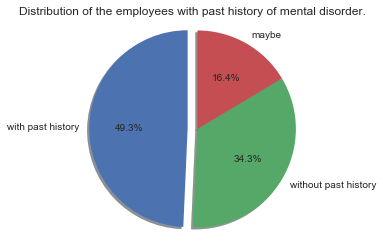

In [1928]:
labels = ['with past history','without past history','maybe']
sizes = [525, 365, 175]
explode = (0.1,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Distribution of the employees with past history of mental disorder.")
plt.show()

In [1929]:
df.groupby('current_state').count()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,treatment,remote
current_state,,,,,,,,,,
0,422,422,422,422,422,422,422,422,422,422
1,241,241,241,241,241,241,241,241,241,241
2,402,402,402,402,402,402,402,402,402,402


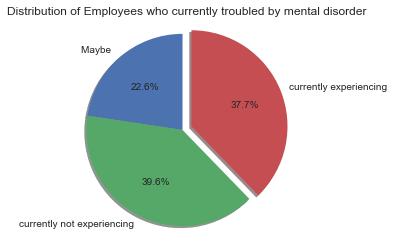

In [1930]:
labels = ['Maybe ','currently not experiencing','currently experiencing']
sizes = [241, 422, 402]
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Employees who currently troubled by mental disorder')
plt.show()

According to the two graphs above, almost half of the employees who toke the survey have had issue of mental health disorder in the current or past. Concerning the ones who were not sure about their mental health condition, employers should be awares that most of their employees can be troubled by mental disorder. 

In [1931]:
#treatment
df.groupby('treatment').count()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,remote
treatment,,,,,,,,,,
False,472,472,472,472,472,472,472,472,472,472
True,593,593,593,593,593,593,593,593,593,593


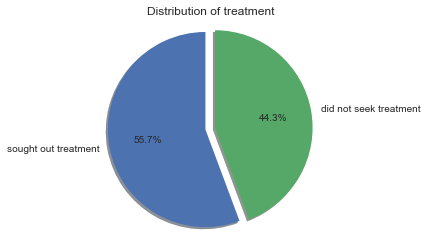

In [1932]:
labels = ['sought out treatment','did not seek treatment']
sizes = [593,472]
explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of treatment")
plt.show()

As we can see from the graph above, most of the employees who realized that they have issue with their mental health, they would like seeking help from a mental health professional. 

In [1933]:
#treatment
df.groupby('employer_awareness').count()

,age,gender,residence_location,work_location,num_employees,family_history,past_history,current_state,treatment,remote
employer_awareness,,,,,,,,,,
0,757,757,757,757,757,757,757,757,757,757
1,211,211,211,211,211,211,211,211,211,211
2,97,97,97,97,97,97,97,97,97,97


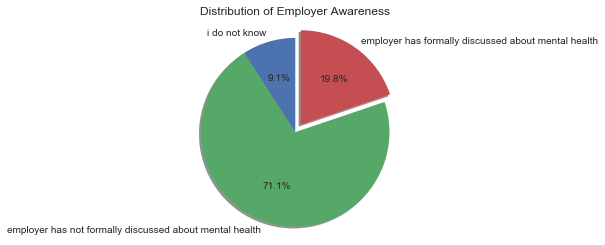

In [1934]:
labels = ['i do not know','employer has not formally discussed about mental health', 'employer has formally discussed about mental health']
sizes = [97, 757, 211]
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Employer Awareness")
plt.show()

Obviously, most employers have not formally concerned about the mental health condition of their employees, which can be mostly bad.
    

## Age

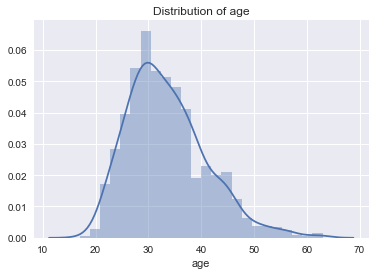

In [1935]:
map = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.age)
plt.title('Distribution of age')

It almost looks like there is could be a bimodal distribution, but I think that could probably be explained away from the fact that there appear to be very few people who are ~33 for some reason.  Also the kernel density looks roughly normal.  So we'll say that it's roughly normal.

You can also see that the distribution has a long right tail, which makes sense as tech industry jobs are generally filled by younger people.

Let's see what the age distribution is for people reporting that they currently have a mental illness

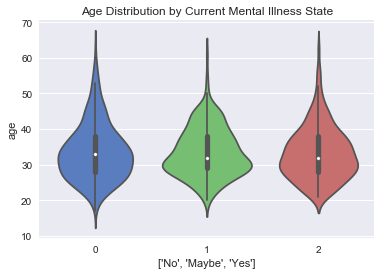

In [1936]:
ax = sns.violinplot(x='current_state',y='age',
                    data=df, palette="muted",inner='box')
ax.set_title('Age Distribution by Current Mental Illness State')
ax.set_xlabel(['No', 'Maybe', 'Yes'])

The age distributions for each response are pretty much the same, and look similar to the overall age distribution.  This means that age is probably not a very good predictor.

We can group people into three bins based on how old they are to see if there's a more general relationship between when someone is in their career, and how they report their mental health.

In [1937]:
df['career_stage'] = pd.cut(df.age, bins=[0,30,45,65], labels=['rookie','middle','veteran'])

group_stage = df.groupby('career_stage')
group_stage.size()

career_stage
middle     566
rookie     427
veteran     72
dtype: int64

Not too many in the 'veteran' category, but still enough to get some meaning probably

Lets see how each group reports having mental illness, either in the past or present

career_stage  past_history
middle        0               187
              1               100
              2               279
rookie        0               156
              1                67
              2               204
veteran       0                22
              1                 8
              2                42
dtype: int64


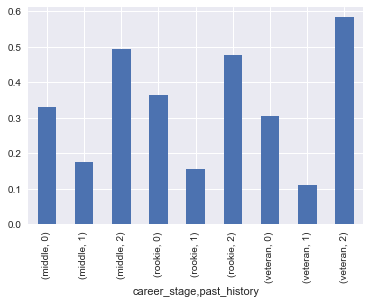

In [1938]:
group_stage_history = df.groupby(['career_stage', 'past_history'])
print(group_stage_history.size())
past_percentage = group_stage_history.size() / group_stage.size()
past_percentage.plot(kind='bar')


Looks like the break down is essentially the same across all categories

Lets look at current state

career_stage  current_state
middle        0                220
              1                135
              2                211
rookie        0                164
              1                 96
              2                167
veteran       0                 38
              1                 10
              2                 24
dtype: int64


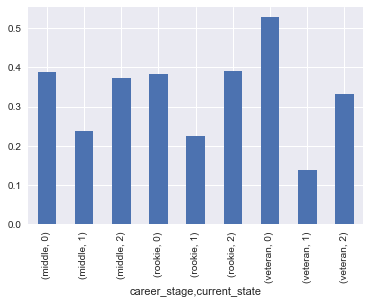

In [1939]:
group_stage_current = df.groupby(['career_stage', 'current_state'])
print(group_stage_current.size())
current_percentage = group_stage_current.size() / group_stage.size()
current_percentage.plot(kind='bar')

People are reporting mental illness essentially the same way over the career.

## Gender

Let's start out by taking a look at the gender gap in tech.  Shouldn't be too many surprises here.

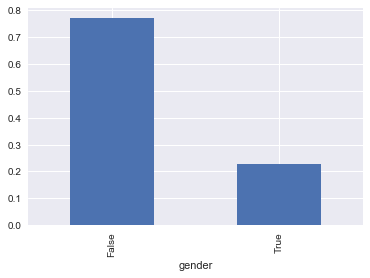

In [1940]:
df_group_gender = df.groupby('gender')

workforce = df_group_gender.age.count() / len(df)
ax = workforce.plot(kind='bar')

This was expected, and is very well documented.

Is there a difference between men and women when it comes to how they report their mental health?

gender  past_history
False   0               309
        1               141
        2               371
True    0                56
        1                34
        2               154
dtype: int64


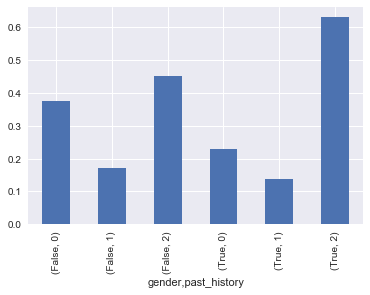

In [1941]:
group_gender_history = df.groupby(['gender', 'past_history'])
print(group_gender_history.size())
past_percentage = group_gender_history.size() / df_group_gender.size()
past = past_percentage.plot(kind='bar')


gender  current_state
False   0                349
        1                199
        2                273
True    0                 73
        1                 42
        2                129
dtype: int64


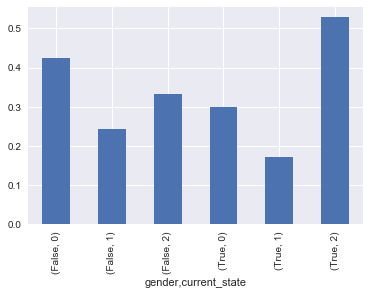

In [1942]:
group_gender_current = df.groupby(['gender', 'current_state'])
print(group_gender_current.size())
current_percentage_gender = group_gender_current.size() / df_group_gender.size()
current = current_percentage_gender.plot(kind='bar')

Women appear to have a higher probability of reporting having a mental illness.

## Family history

Recall that repsponses to this question are

- 1 = No
- 2 = Yes
- 3 = I don't know

family_history
0    377
1    492
2    196
dtype: int64


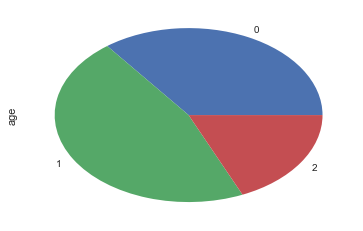

In [1943]:
group_family = df.groupby('family_history')
print(group_family.size())
family_percent = group_family.age.count() / len(df)
ax = family_percent.plot(kind='pie')

Nearly 50% of people in tech reported a family history of mental illness.  This seems very high when The National Alliance on Mental Illness reported in 2015 that about 18% of the entire U.S. Population. (https://www.nami.org/Learn-More/Mental-Health-By-the-Numbers)

family_history  past_history
0               0               236
                1                47
                2                94
1               0                73
                1                71
                2               348
2               0                56
                1                57
                2                83
dtype: int64


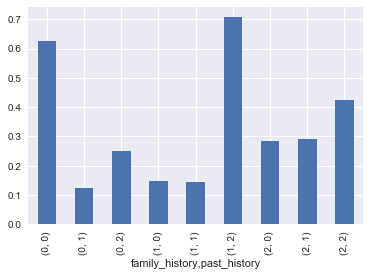

In [1944]:
group_family_history = df.groupby(['family_history', 'past_history'])
print(group_family_history.size())
past_percentage = group_family_history.size() / group_family.size()
past_percentage.plot(kind='bar')


family_history  current_state
0               0                245
                1                 65
                2                 67
1               0                119
                1                102
                2                271
2               0                 58
                1                 74
                2                 64
dtype: int64


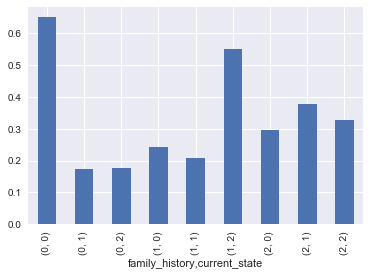

In [1945]:
group_family_current = df.groupby(['family_history', 'current_state'])
print(group_family_current.size())
current_percentage = group_family_current.size() / group_family.size()
current = current_percentage.plot(kind='bar')

Looks like a family history is a pretty good indicator of a persons mental health reporting.

## Lets see if people get treatment when they have reported mental illness

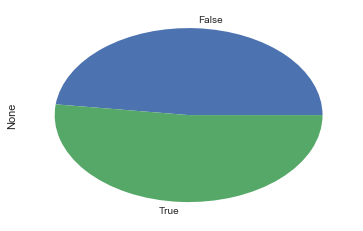

In [1946]:
ill = df[(df.past_history == 1) | (df.current_state == 1)]
ill.groupby('treatment').size().plot(kind='pie')

That's troubling.  Only about 50% of the time when someone reports a mental illness do they get treatment.

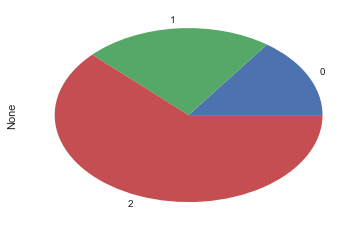

In [1947]:
helped = df[(df.past_history != 0) & (df.treatment == True)]
helped.groupby('current_state').size().plot(kind='pie')

This might be a reason why:  when people get treatment, there doesn't seem to be much improvement.  Only about 15% of people who reported 'Yes' or 'Maybe' to having an illness in the past that sought treatment saw improvement in their condition.

## Company Size

There were six different options for company size (1-5), (6-25), (26-100), (101-500), (500-1000), and (1000+).

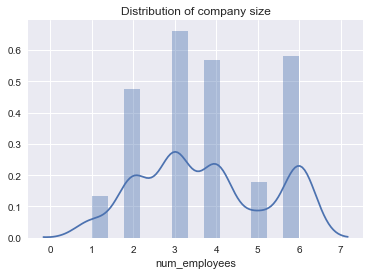

In [1948]:
sns.distplot(df.num_employees)
plt.title('Distribution of company size')


There were very few participants who worked at very small companies (1-5 employees).  The remaining bins were all pretty equally represented except for the second largest bin (501-1000).

current_state    0   1    2
num_employees              
1               27  13   15
2               81  49   65
3              106  52  113
4               82  63   88
5               33  19   21
6               93  45  100


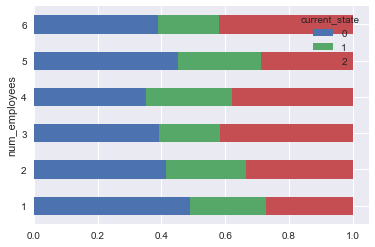

In [1949]:
current_ill = pd.crosstab([df.num_employees], [df.current_state])
print(current_ill)

rate = current_ill.div(current_ill.sum(1).astype(float),axis=0) # normalize the value
rate.plot(kind='barh', stacked=True)

current_state    0   1    2
num_employees              
1               27  13   15
2               81  49   65
3              106  52  113
4               82  63   88
5               33  19   21
6               93  45  100


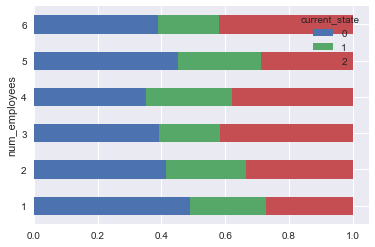

In [1950]:
past_ill = pd.crosstab([df['num_employees']], df.current_state)
print(past_ill)

rate = past_ill.div(past_ill.sum(1).astype(float),axis=0) # normalize the value
rate.plot(kind='barh', stacked=True)

There seems to be a very slight relation between company size and mental health.  We should look at the correlation.

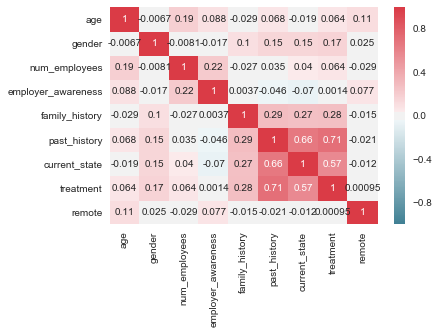

In [1951]:
sns.heatmap(df.corr(), cmap=cmap, annot=True)


There does appear to be a very slight correlation between the size of the company and current mental health. The positive correlation indicates that higher number of employess corresponds to higher responses to the mental health question, which, because of way we encoded the mental health response (0-No, 1-Maybe, 2-Yes) matches up with the previous chart.

It appears the strongest correlation is between past and current state.  Which is expected, and was evidenced earlier--i.e. people who had an illness in the past tend to keep having an illnes.

There can be many potential associations between the features found in the survey. 
    
In order to better understand the common features of the workers with mental health disorder, it's important to find the analytic relationships between the features. 
    
The two core features in the data set are 'past_hisotry' and 'current_state'. 
    
    
    

In [1952]:
df_both = df[(df['current_state'] == 1) & (df['past_history'] == 1)]
df_both
print('people who both experience the mental disorder currently and in the past '+ str(df_both.age.count()))

df_current = df[(df['current_state'] == 1) & (df['past_history'] == 0)]
print('people who only experience the mental disorder currently '+ str(df_current.age.count()))

df_past = df[(df['current_state'] == 0) & (df['past_history'] == 1)]
print('people who only experience the mental disorder in the past '+ str(df_past.age.count()))

people who both experience the mental disorder currently and in the past 112
people who only experience the mental disorder currently 39
people who only experience the mental disorder in the past 48


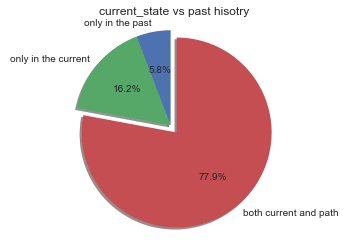

In [1953]:
labels = ['only in the past','only in the current', 'both current and path']
sizes = [27,75,360]
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('current_state vs past hisotry')
plt.show()

Concerning the attribute of past_history and current_hisotry can be maybe, yes or no. There can be totally 9 different combinations of the two attributes:
- yes, no
- no, yes
- no, no
- yes, yes
- maybe, yes
- yes, maybe
- maybe, no 
- no, maybe
- maybe, maybe

Since the "maybe" is very ambigous, we decide to treat "maybe" as no. 

Therefore, as we want to filter out people who either has past, current, or both experience of mental disorder, we need one more attributes to simplify the future analitics. 

Then, we apply or operation to the two features, it gives us a new one which is "past or current experience" (POC).
According to the graph above, it shows that almost 80 percent of the people who have mental health disorder in the current, also have had mental health disorder in the past. The sypmtom can be repeated as the time goes. 

In [1954]:
df['poc'] = df['current_state'] | df['past_history']
df.poc.replace(to_replace = range(4),
          value = [0,0,1,1],
          inplace = True)
df


,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote,career_stage,poc
0,39,False,United Kingdom,United Kingdom,3,0,0,2,0,False,1,middle,1
1,29,False,United States of America,United States of America,2,1,1,2,2,True,0,rookie,1
4,43,True,United States of America,United States of America,2,0,1,2,2,True,1,middle,1
5,42,False,United Kingdom,United Kingdom,6,0,0,0,2,True,1,middle,1
6,30,False,United States of America,United States of America,3,0,0,0,0,False,1,rookie,0
7,37,True,United States of America,United States of America,6,0,1,2,2,True,2,middle,1
8,44,True,United States of America,United States of America,3,0,1,2,2,True,1,middle,1
10,28,False,United States of America,United States of America,3,1,2,2,2,True,0,rookie,1
11,34,False,United States of America,United States of America,4,0,1,2,2,True,1,middle,1
12,30,True,United States of America,United States of America,4,0,1,2,2,True,2,rookie,1


    Now, it's avalaible to see the distribution of poc in the overall data set.

In [1955]:
df.groupby('poc').count()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote,career_stage
poc,,,,,,,,,,,,
0,498,498,498,498,498,498,498,498,498,498,498,498
1,567,567,567,567,567,567,567,567,567,567,567,567


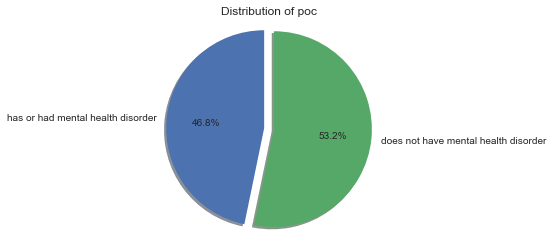

In [1956]:
labels = ['has or had mental health disorder', 'does not have mental health disorder']
sizes = [498, 567]
explode = (0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of poc')
plt.show()

    Relation between Employer_awareness and whether have experience of mental disorder

poc                   0    1
employer_awareness          
0                   350  407
1                    93  118
2                    55   42


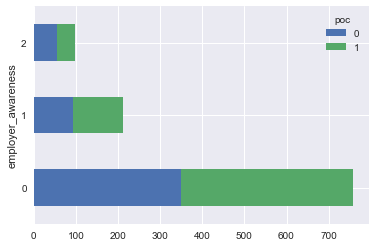

In [1957]:
poc_vs_emp = pd.crosstab(df['employer_awareness'], df['poc'])
print (poc_vs_emp)
poc_vs_emp.plot(kind = 'barh', stacked = True)

    The relationship between poc and employer_awarness is not obvious. As the graph shows, most people either had or having the mental health disorder problem in most companies. 
    
Relationship between employer_awareness and treatment

treatment           False  True 
employer_awareness              
0                     341    416
1                      83    128
2                      48     49


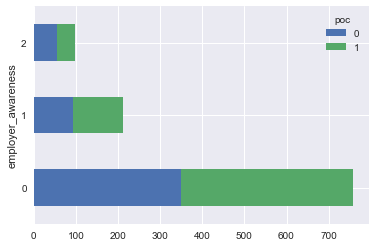

In [1958]:
#Employer awareness and treatment
poc_vs_treat = pd.crosstab(df['employer_awareness'], df['treatment'])
print (poc_vs_treat)
poc_vs_emp.plot(kind = 'barh', stacked = True)

    Similar as the employe wareness vs poc, the relationship between treatment and employer's wareness is also not obvious. More than half of employees who had or having the mental health disorder would like to receive treatment from mental health professionals in most companies. 

## Dimensionality reduction

Although we started with an initial cut from 63 down to 12 features, we might be interested in boiling it down even a bit more.

As stated before the majority of our features are categorical.  In fact most of them are nominal, but we've encoded them in an ordinal way.  Principal Component Analysis was designed to work on continuous data, but we can try it to see what happens.

In [1959]:
from sklearn.decomposition.pca import PCA
from sklearn import preprocessing

# scale to 0 mean
df_scaled = df.copy()
df_scaled[['age', 'num_employees', 'gender', 'employer_awareness', 
           'family_history', 'past_history', 'treatment', 'remote']] = preprocessing.scale(df_scaled[['age', 'num_employees', 'gender', 'employer_awareness', 
           'family_history', 'past_history', 'treatment', 'remote']])

for col in ['residence_location', 'work_location', 'career_stage', 'current_state']:
    if col in df_scaled:
        del df_scaled[col]
df_scaled=pd.DataFrame(df_scaled)
df_scaled.head()

,age,gender,num_employees,employer_awareness,family_history,past_history,treatment,remote,poc
0,0.732885,-0.545159,-0.483028,-0.588311,-1.163275,0.942376,-1.120873,0.130163,1
1,-0.599292,-0.545159,-1.135851,0.958729,0.238182,0.942376,0.892162,-1.344553,1
4,1.265756,1.834327,-1.135851,-0.588311,0.238182,0.942376,0.892162,0.130163,1
5,1.132539,-0.545159,1.475442,-0.588311,-1.163275,-1.275592,0.892162,0.130163,1
6,-0.466074,-0.545159,-0.483028,-0.588311,-1.163275,-1.275592,-1.120873,0.130163,0


In [1960]:
from sklearn.decomposition import PCA

X = df_scaled
y = df.current_state
target_names='current_state'

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

# print the components

print ('pca:', pca.components_)
print(df_scaled.columns)

pca: [[ 0.07222713  0.22389098  0.06101909 -0.01478728  0.34893346  0.6133795
   0.60213998 -0.00683412  0.28302977]
 [ 0.52942914 -0.06986903  0.59752621  0.53882692 -0.1194594  -0.02596791
   0.01787027  0.22824841 -0.00946113]]
Index(['age', 'gender', 'num_employees', 'employer_awareness',
       'family_history', 'past_history', 'treatment', 'remote', 'poc'],
      dtype='object')


The highest weights on the 1st Principal Component correspond to past_history and treatment, which makes sense, as they had the highest correlation above.

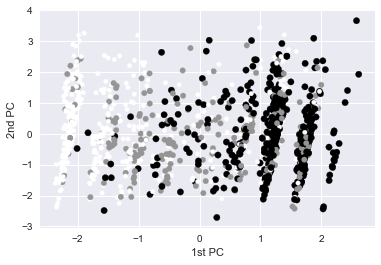

In [1961]:
df_pca = pd.DataFrame(X_pca,columns=['1st PC', '2nd PC'])


# scatter plot the output, with the names created from the weights
df_pca.plot(kind='scatter', x='1st PC', y='2nd PC', c=y, s=(y+2)*10)


Even though PCA wasn't designed for our type of data it seems to have produced at least something meaningful: as there is a clear trend along the 1st principal component from 'No' to 'Yes'.

## Reference

[https://www.kaggle.com/osmi/mental-health-in-tech-survey]